# Introductory examples

## 1.usa.gov data from bit.ly

In [1]:
%pwd  

'/Users/yeongusil/Downloads/school/Data Science'

In [2]:
path = 'data_pandas/usagov_bitly_data2012-03-16-1331923249.txt'  # 해당 부분 다시 확인하기 !

In [3]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
import json
path = 'data_pandas/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path, encoding="UTF-8")]

In [5]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [6]:
records[0]['tz']

'America/New_York'

In [7]:
print(records[0]['tz'])

America/New_York


### Counting time zones in pure Python

In [8]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [9]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [10]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [11]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [12]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [13]:
counts = get_counts(time_zones)

In [14]:
counts['America/New_York']

1251

In [15]:
len(time_zones)

3440

In [16]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [17]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [18]:
from collections import Counter

In [19]:
counts = Counter(time_zones)

In [20]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Counting time zones with pandas

In [21]:
%matplotlib inline

In [22]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)

In [23]:
import json
path = 'data_pandas/usagov_bitly_data2012-03-16-1331923249.txt'
lines = open(path, encoding="UTF-8").readlines()
records = [json.loads(line) for line in lines]

In [24]:
from pandas import DataFrame, Series
import pandas as pd

frame = DataFrame(records)
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [25]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [26]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [27]:
clean_tz = frame['tz'].fillna('Missing')  # 비어있는 객체를 채워주는 함수 ! 나중에 필요할 수 있다.
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [28]:
plt.figure(figsize=(10, 4))

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<AxesSubplot:>

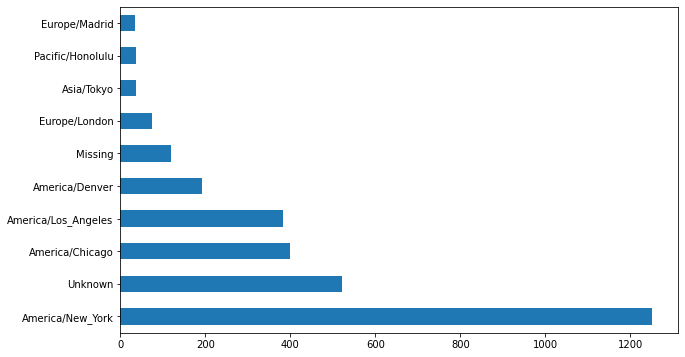

In [29]:
tz_counts[:10].plot(kind='barh', rot=0)

In [30]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [31]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [32]:
frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [33]:
results = Series([x.split()[0] for x in frame.a.dropna()])  #x.split -> sapce 단위로 자름
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [34]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [35]:
cframe = frame[frame.a.notnull()]
print(cframe)

                                                      a   c   nk  \
0     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...  US  1.0   
1                                GoogleMaps/RochesterNY  US  0.0   
2     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...  US  1.0   
3     Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...  BR  0.0   
4     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...  US  0.0   
...                                                 ...  ..  ...   
3555  Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...  US  1.0   
3556  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...  US  0.0   
3557                             GoogleMaps/RochesterNY  US  0.0   
3558                                     GoogleProducer  US  0.0   
3559  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...  US  0.0   

                       tz  gr       g       h             l              al  \
0        America/New_York  MA  A6qOVH  wfLQtf       orofrog  en-US,en;q=0.8   
1          America/Denver

In [36]:
frame.a.notnull()

0       True
1       True
2       True
3       True
4       True
        ... 
3555    True
3556    True
3557    True
3558    True
3559    True
Name: a, Length: 3560, dtype: bool

In [37]:
operating_system = np.where(cframe['a'].str.contains('Windows'),
                            'Windows', 'Not Windows') 
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [38]:
by_tz_os = cframe.groupby(['tz', operating_system])  # 두 가지 합침

In [39]:
print(by_tz_os.size())

tz                            
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64


In [40]:
print(by_tz_os.size().unstack())

                     Not Windows  Windows
tz                                       
                           245.0    276.0
Africa/Cairo                 NaN      3.0
Africa/Casablanca            NaN      1.0
Africa/Ceuta                 NaN      2.0
Africa/Johannesburg          NaN      1.0
...                          ...      ...
Europe/Volgograd             NaN      1.0
Europe/Warsaw                1.0     15.0
Europe/Zurich                4.0      NaN
Pacific/Auckland             3.0      8.0
Pacific/Honolulu             NaN     36.0

[97 rows x 2 columns]


In [41]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [42]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:1]

tz
    24
dtype: int64

In [43]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [44]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:ylabel='tz'>

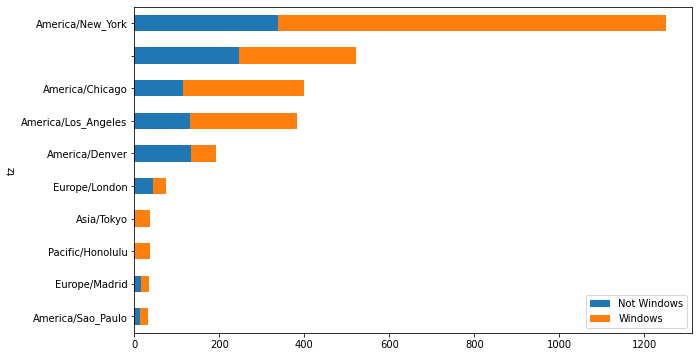

In [45]:
count_subset.plot(kind='barh', stacked=True)

In [46]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:ylabel='tz'>

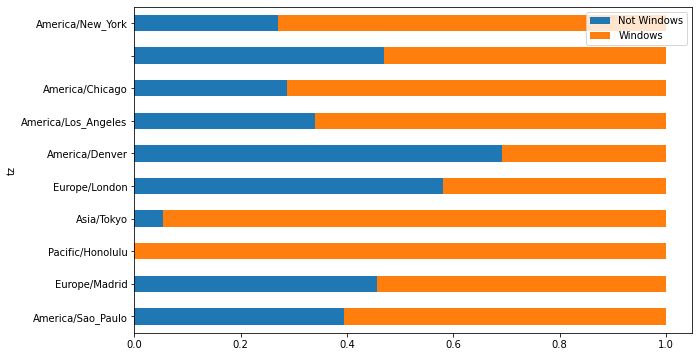

In [47]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

## MovieLens 1M data set

In [48]:
import pandas as pd
import os
encoding = 'latin1'

upath = os.path.expanduser('data_pandas/movielens/users.dat')
rpath = os.path.expanduser('data_pandas/movielens/ratings.dat')
mpath = os.path.expanduser('data_pandas/movielens/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding)
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding)

/var/folders/7j/7y28gvjs7l112k2d6kq82jsw0000gn/T/ipykernel_34038/1857569961.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding)
/var/folders/7j/7y28gvjs7l112k2d6kq82jsw0000gn/T/ipykernel_34038/1857569961.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding)
/var/folders/7j/7y28gvjs7l112k2d6kq82jsw0000gn/T/ipykernel_34038/1857569961.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex sepa

In [49]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [50]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [51]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [52]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [53]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [54]:
data.iloc[20]

user_id                                           62
movie_id                                        1193
rating                                             4
timestamp                                  977968584
gender                                             F
age                                               35
occupation                                         3
zip                                            98105
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 20, dtype: object

In [55]:
mean_ratings = data.pivot_table('rating', index='title',  # pivot table 확인하기 !
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [56]:
ratings_by_title = data.groupby('title').size()  # 평가를 매긴 사람이 몇명이니?

In [57]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [58]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [59]:
active_titles[:10]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)'],
      dtype='object', name='title')

In [61]:
mean_ratings = mean_ratings.loc[active_titles]  # 위의 인덱스가 true 인 애들, rating이 특정 threshold 보다 높은 친구들
mean_ratings[:50]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [62]:
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

In [65]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### Measuring rating disagreement

In [66]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F'] # 여자가 더 좋아하는 쪽, revert 시 남자가 더 좋아하는 쪽

In [68]:
sorted_by_diff = mean_ratings.sort_values(by='diff') # 오름차순 진행
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [69]:
# Reverse order of rows, take first 15 rows
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [71]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()  # 호불호가 많이 갈리는가? -> standard deviation 

# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]


In [72]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

### US Baby Names 1880-2010

In [73]:
from __future__ import division
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 5))
np.set_printoptions(precision=4)
%pwd

'/Users/yeongusil/Downloads/school/Data Science'

http://www.ssa.gov/oact/babynames/limits.html

In [74]:
!head -n 10 ch02/names/yob1880.txt

head: ch02/names/yob1880.txt: No such file or directory


In [83]:
import pandas as pd
names1880 = pd.read_csv('data_pandas/names/yob2010.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Isabella,F,22731
1,Sophia,F,20477
2,Emma,F,17179
3,Olivia,F,16860
4,Ava,F,15300
...,...,...,...
33833,Zymaire,M,5
33834,Zyonne,M,5
33835,Zyquarius,M,5
33836,Zyran,M,5


In [84]:
names1880.groupby('sex').births.sum()

sex
F    1759010
M    1898382
Name: births, dtype: int64

In [85]:
# 2010 is the last available year right now
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'data_pandas/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [86]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [87]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)

In [88]:
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


In [89]:
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

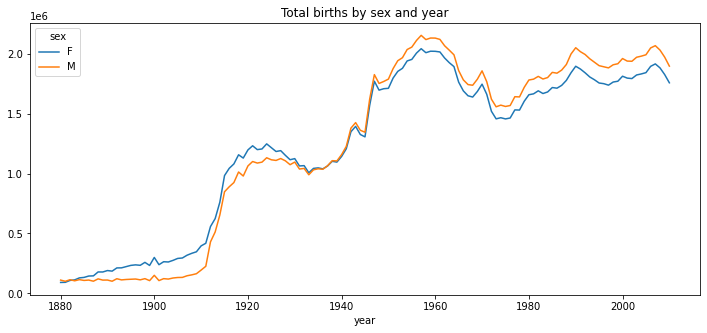

In [90]:
total_births.plot(title='Total births by sex and year')

In [93]:
def add_prop(group):  # 전체의 몇 퍼센트
    # Integer division floors
    births = group.births.astype(float)

    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [94]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [95]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [97]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000) # 해당 방식 공부해보기

In [99]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [100]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [101]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [102]:
top1000.index = np.arange(len(top1000))

### Analyzing naming trends

In [103]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [104]:
total_births = top1000.pivot_table('births', index='year', columns='name',
                                   aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

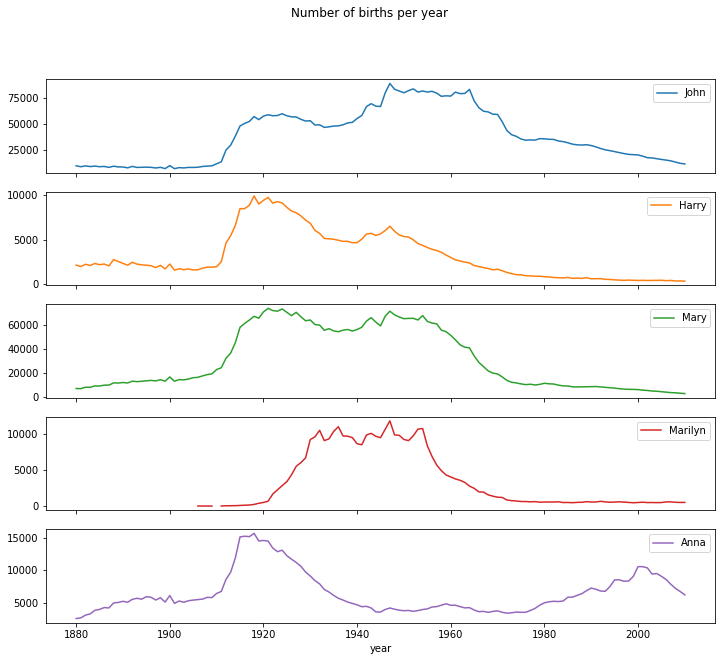

In [105]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn', 'Anna']]
subset['Marilyn'].fillna('0')
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

In [106]:
subset

name,John,Harry,Mary,Marilyn,Anna
year,,,,,
1880,9701.0,2158.0,7092.0,NaN,2616.0
1881,8795.0,2002.0,6948.0,NaN,2714.0
1882,9597.0,2246.0,8179.0,NaN,3143.0
1883,8934.0,2116.0,8044.0,NaN,3322.0
1884,9427.0,2338.0,9253.0,NaN,3880.0
...,...,...,...,...,...
2006,15140.0,414.0,4073.0,596.0,8590.0
2007,14405.0,443.0,3665.0,597.0,7866.0
2008,13273.0,379.0,3478.0,543.0,7236.0


#### Measuring the increase in naming diversity

In [107]:
plt.figure()

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

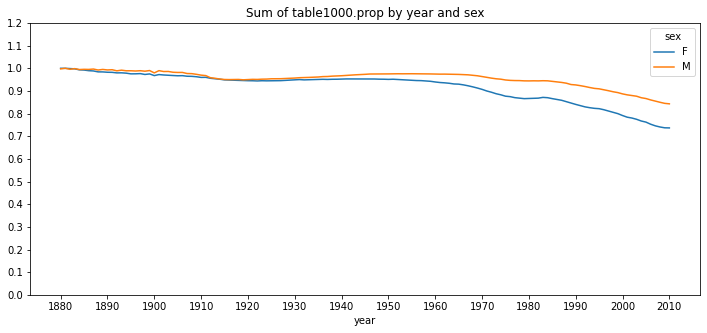

In [108]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [109]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [110]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [111]:
prop_cumsum.values.searchsorted(0.5)

116

In [112]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [113]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

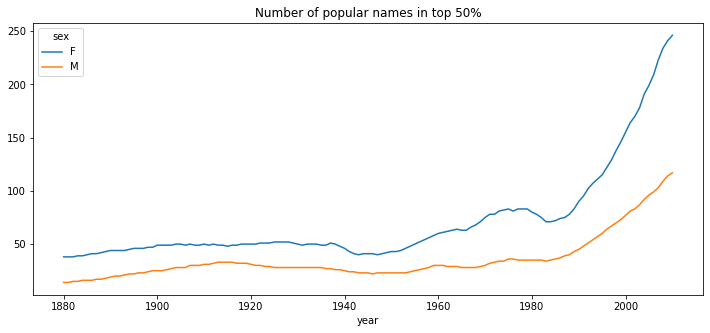

In [114]:
diversity.plot(title="Number of popular names in top 50%")

#### The "Last letter" Revolution

In [115]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [116]:
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [117]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()


sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [118]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [119]:
letter_prop = subtable / subtable.sum().astype(float)

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

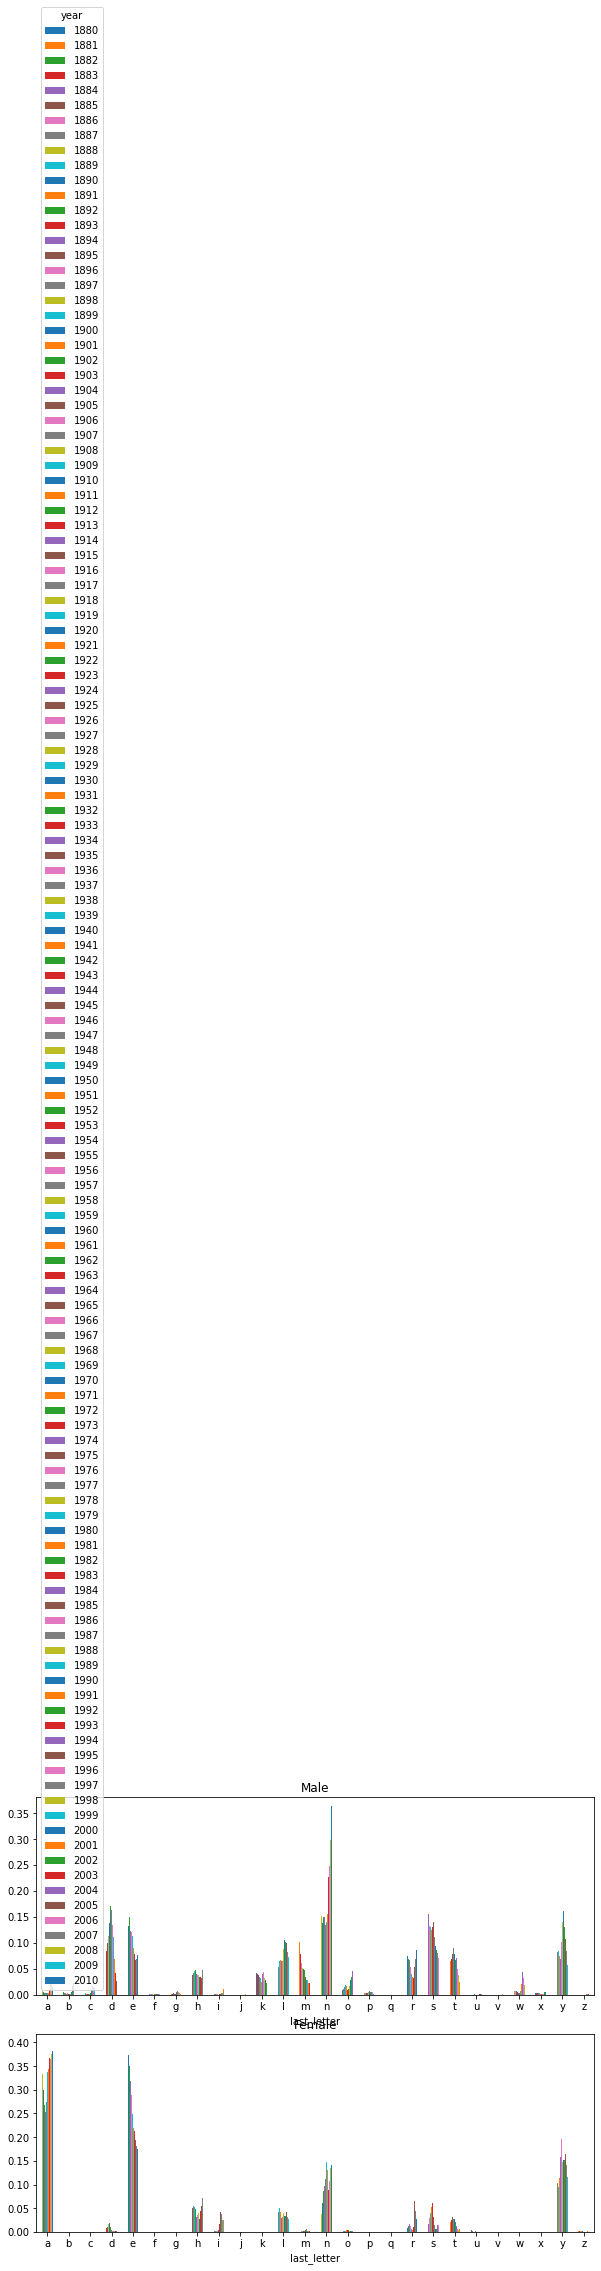

In [123]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [124]:
plt.subplots_adjust(hspace=0.25)

<Figure size 864x360 with 0 Axes>

In [125]:
letter_prop = table / table.sum().astype(float)

dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


In [126]:
plt.close('all')

<AxesSubplot:xlabel='year'>

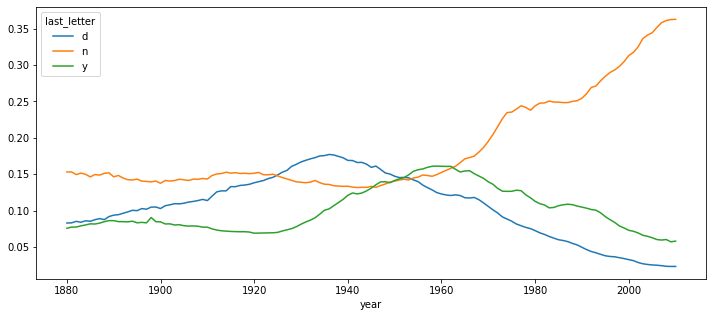

In [127]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [128]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [129]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [130]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


In [131]:
plt.close('all')

<AxesSubplot:xlabel='year'>

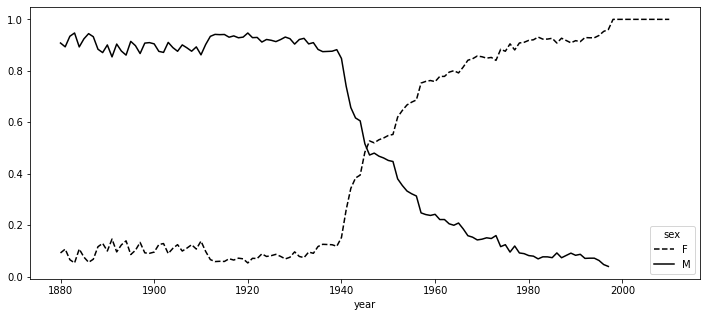

In [132]:
table.plot(style={'M': 'k-', 'F': 'k--'})